# Initial exploration of the data

In [33]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1547)
import seaborn as sns

In [34]:
%ls


 Volume in drive C is Windows
 Volume Serial Number is 361D-A6A7

 Directory of C:\Users\Don\Desktop\github\exoplanets\data\processed

03/30/2018  07:21 AM    <DIR>          .
03/30/2018  07:21 AM    <DIR>          ..
03/25/2018  02:34 PM                 0 .gitkeep
03/29/2018  11:29 PM           721,623 Cleaned.csv
03/31/2018  10:52 AM           665,944 Finalized.csv
               3 File(s)      1,387,567 bytes
               2 Dir(s)  20,498,214,912 bytes free


In [99]:
import math
df=pd.read_csv('Cleaned.csv')


## More feature engineering for this set can be seen in my medium post at:

0       2018
1       2018
2       2018
3       2018
4       2018
5       2018
6       2018
7       2018
8       2018
9       2018
10      2018
11      2018
12      2018
13      2018
14      2018
15      2018
16      2018
17      2018
18      2018
19      2018
20      2018
21      2018
22      2018
23      2018
24      2018
25      2018
26      2018
27      2018
28      2018
29      2018
        ... 
6543    2199
6544    2199
6545    2199
6546    2199
6547    2199
6548    2199
6549    2199
6550    2199
6551    2199
6552    2199
6553    2199
6554    2199
6555    2199
6556    2199
6557    2200
6558    2200
6559    2200
6560    2200
6561    2200
6562    2200
6563    2200
6564    2200
6565    2200
6566    2200
6567    2200
6568    2200
6569    2200
6570    2200
6571    2200
6572    2200
Name: Close-Approach (CA) Date, Length: 6573, dtype: int64

In [106]:
df=pd.read_csv('Finalized.csv')
# df=df.drop('Unnamed: 0',axis=1)
df['Extinction'].describe()

count    6573.000000
mean        0.181500
std         0.385461
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Extinction, dtype: float64

## Initial part of the data exploration, just the base decriptive stats

In [38]:
df['CA Distance Minimum (au)'].describe() # Median and mean are pretty close

count    6573.000000
mean        0.027733
std         0.013611
min         0.000000
25%         0.016890
50%         0.028940
75%         0.039340
max         0.049990
Name: CA Distance Minimum (au), dtype: float64

In [39]:
df['V relative (m/s)'].describe() #ok so the mean and the median are pretty close

count     6573.000000
mean     11027.130686
std       6007.204384
min        450.000000
25%       6620.000000
50%       9640.000000
75%      14330.000000
max      41970.000000
Name: V relative (m/s), dtype: float64

In [40]:
df['Close-Approach (CA) Date'].describe() #No repeats and must section off by groups

count    6573.000000
mean     2096.251331
std        50.684674
min      2018.000000
25%      2054.000000
50%      2089.000000
75%      2136.000000
max      2200.000000
Name: Close-Approach (CA) Date, dtype: float64

In [41]:
df['Estimated Diameter(meters)'].describe()# huuuuuge standard deviation and mean and media are skewed

count    6573.000000
mean      744.757797
std      1878.117916
min        13.000000
25%        39.000000
50%       130.000000
75%       320.000000
max      8987.000000
Name: Estimated Diameter(meters), dtype: float64

In [42]:
df['Mass(Kg)'].describe() # becuase of the massive scales of how this works( and for te sake of NOT doing densities)

count    6.573000e+03
mean     2.772881e+14
std      1.088642e+15
min      2.070624e+07
25%      5.590684e+08
50%      2.070624e+10
75%      3.088311e+11
max      6.840933e+15
Name: Mass(Kg), dtype: float64

In [43]:
df['Force(joules)'].describe() # mean and media are close enough but 

count    6.573000e+03
mean     1.034649e+18
std      4.495060e+18
min      1.836173e+10
25%      2.139354e+12
50%      1.187730e+14
75%      2.290302e+15
max      6.016003e+19
Name: Force(joules), dtype: float64

In [44]:
df['Megatons(TNT)'].describe()

count      6573.000000
mean       5115.472350
std       15423.232019
min           0.000070
25%           1.833819
50%          35.361579
75%        1963.209666
max      228736.624162
Name: Megatons(TNT), dtype: float64

In [45]:
df['Damage'].describe()

count    6522.000000
mean        6.064091
std         2.108221
min         1.000000
25%         5.000000
50%         5.000000
75%         8.000000
max         9.000000
Name: Damage, dtype: float64

In [46]:
df['Extinction'].value_counts()

0    6573
Name: Extinction, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6573 entries, 0 to 6572
Data columns (total 10 columns):
Object                        6573 non-null object
Close-Approach (CA) Date      6573 non-null int64
CA Distance Minimum (au)      6573 non-null float64
V relative (m/s)              6573 non-null float64
Estimated Diameter(meters)    6573 non-null int64
Mass(Kg)                      6573 non-null float64
Force(joules)                 6573 non-null float64
Megatons(TNT)                 6573 non-null float64
Damage                        6522 non-null float64
Extinction                    6573 non-null int64
dtypes: float64(6), int64(3), object(1)
memory usage: 513.6+ KB


## Visializations

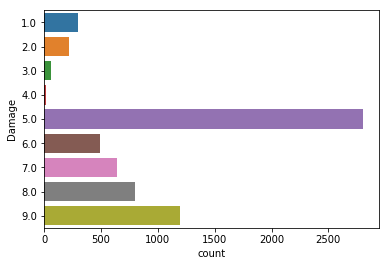

In [48]:
sns.countplot(y='Damage', data=df,orient='h')
#counts of the level of damage don

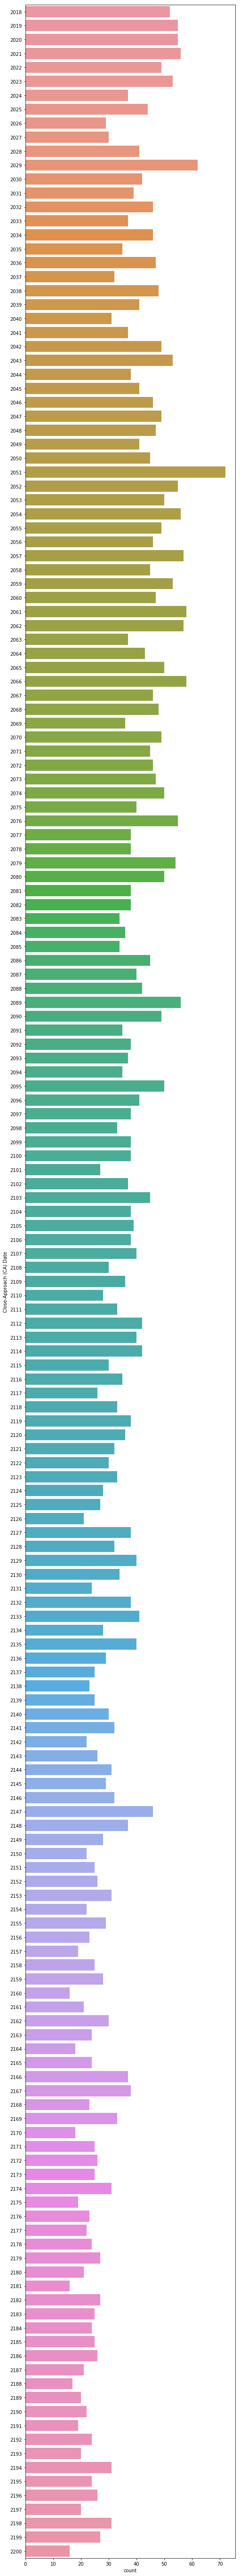

In [49]:
plt.figure(figsize=(8,100))
sns.countplot(y='Close-Approach (CA) Date', data=df,orient='h')
#counts of the totql number of occurences by year

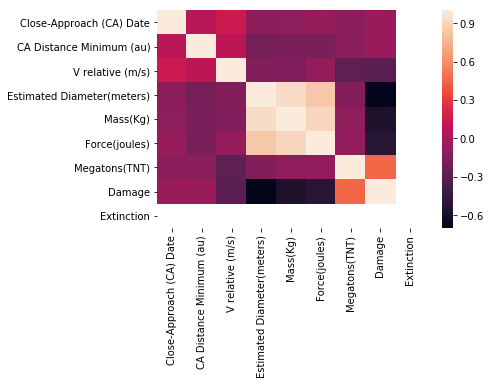

In [50]:
sns.heatmap(df.corr()) 
# highest correclation between extinction events and megatons of TNT as expected

In [51]:
# as expected( and due to the heavy amount of math in calculating the features) there is a direct correclaton between force/ 
# velocity and mass

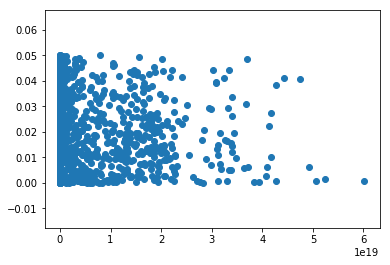

In [88]:
plt.scatter(df['Force(joules)'], df['CA Distance Minimum (au)'])
#based on these it loos like theres no correlation between the distance and the amount of force, which makes sense given the
#spread of astreroids

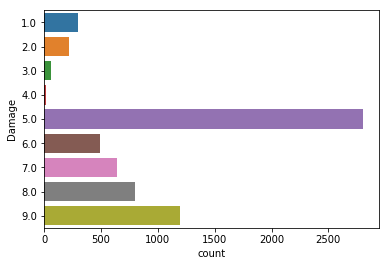

In [91]:
sns.countplot(y='E', data=df,orient='v')
#Just under 1 out of every 6 impacts will create an extinction event

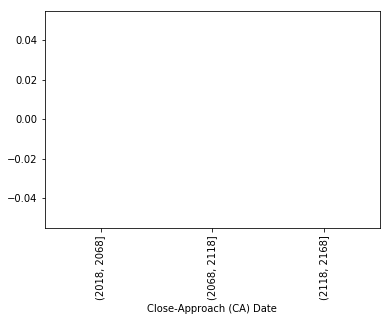

In [86]:
group_by_date = pd.cut(df['Close-Approach (CA) Date'], np.arange(2018, 2200, 50))
date_grouping = df.groupby(group_by_date).mean()
date_grouping['Extinction'].plot.bar()
#most likely dates of extinctions ranges

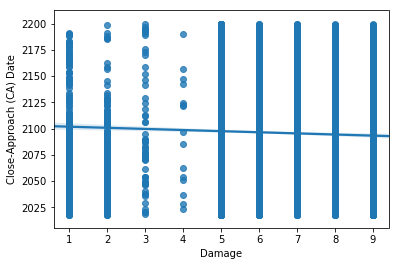

In [89]:
ax = sns.regplot(x=df['Damage'], y=df['Close-Approach (CA) Date'])


## Models and Training

## Decision Tree, to make sure that the model can predict the correct outcomes

In [56]:
# Startting the decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#lets not use the original for the this
DT_df =df
columns= DT_df.columns
DT_df=pd.DataFrame(np.array(DT_df), columns=columns)
DT_df=DT_df.fillna("")
#slicing a pandas dataframe always results in a 2d arrat so must use list then.vales
labels = DT_df.Damage
DT_df=DT_df.drop(['Damage'], axis=1)
DT_df=DT_df.drop(['Object'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(DT_df, list(labels.values))
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)
#must set averages to none for this data due to labels are not binary, but probably one-hot encoded.
f1_score(test_pred,y_test,average=None)
print('The Decision tree classifier made predictions {0} % of the time on this data accurately'.format(100*accuracy_score(y_test,test_pred)))


The Decision tree classifier made predictions 99.81751824817519 % of the time on this data accurately


##  K-Nearest Neighbors modeling

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
KNN_df= df

columns= KNN_df.columns
KNN_df=pd.DataFrame(np.array(KNN_df), columns=columns)
KNN_df=KNN_df.fillna("")
lables_knn= KNN_df.Damage
KNN_df=KNN_df.drop(['Damage'], axis=1)
KNN_df=KNN_df.drop(['Object'], axis=1)

scaler_KNN = StandardScaler()
scaler_KNN.fit(KNN_df)
KNN_scaled= scaler_KNN.transform(KNN_df)

X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(KNN_scaled, list(lables_knn.values), test_size=0.5)
clf_KNN= KNeighborsClassifier(n_neighbors=3)
clf_KNN.fit(X_train_KNN, y_train_KNN)
test_pred = clf_KNN.predict(X_test_KNN)
neighbor = KNeighborsClassifier(n_neighbors=10)
neighbor.fit(X_train_KNN, y_train_KNN)
test_pred_KNN = clf_KNN.predict(X_test_KNN)
accuracy = accuracy_score(y_test_KNN, test_pred_KNN, normalize=True, sample_weight = None)
print("The accuraccy of predicting what type of astroids destroyed what size area utilizing KNN is % {0}".format(100*accuracy))

The accuraccy of predicting what type of astroids destroyed what size area utilizing KNN is % 69.75965926376635


## Naive Bayes Gaussian: 
## This is based on prior knowledge of all of the other features that might be related to the An extinction level event happening.

In [73]:
from sklearn.naive_bayes import GaussianNB
NB_df = df
NB_df= KNN_df
#dropping off extinction as it has too much of a correlation with wheter or not there is an extinction event
NB_target = NB_df['Extinction']
NB_df =NB_df.drop('Extinction', axis=1)
# Scaling to make data more tight for processing
scaler_NB= StandardScaler()
# X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(data1, NB_target, test_size=0.5)
scaler_NB.fit(NB_df)
NB_scaled=scaler_NB.transform(NB_df)
#Fitting to models
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(NB_scaled, NB_target, test_size=0.5)
clf_NB = GaussianNB()
clf_NB.fit(X_train_NB,y_train_NB)
prediction =clf_NB.predict(X_test_NB)
# print(prediction)
# print(y_test_NB)
print("Accuraccy of predicting an Extintion level event giving the parameters and using Naive Bayes is {}%"
      .format(100*accuracy_score(y_test_NB, prediction)))
print("f1 score For this set is: {}".format(f1_score(y_test_NB, prediction, average=None)))

Accuraccy of predicting an Extintion level event giving the parameters and using Naive Bayes is 100.0%
f1 score For this set is: [ 1.]


In [71]:
#KFold Cross Validvation
from sklearn.cross_validation import KFold, cross_val_score
#define a kfold which takes in the lenth of the training set, shffles and has a set number of folds in this case 5
k_fold = KFold(len( NB_target), n_folds=10, shuffle=True, random_state=0)
#declare the classifier type as gaussian
clf= GaussianNB()
#print the folds as percentages, should print 5
# print( cross_val_score(clf_NB, NB_scaled, NB_target, cv=k_fold, n_jobs=1) )
print('KFold Cross Validation with ten folds gives us ten scores of\n {}'.format(100*cross_val_score(clf_NB, NB_scaled, NB_target, cv=k_fold, n_jobs=1)))

KFold Cross Validation with ten folds gives us ten scores of
 [ 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.]


C:\Users\Don\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Linear regression:
## targeting the year that an extinction event is most likely to occur

In [ ]:
# For this one we need to make use of our heatmap to fin features with a high correlation
sns.heatmap(df.corr()) 

In [ ]:
# The highest are of course the engineered features as three of them are directly dependent/ calculated from eachother

from sklearn.linear_model import LinearRegression
LR_df = df
target_LR= LR_df['Close-Approach (CA) Date']
LR_df= LR_df.drop('Close-Approach (CA) Date',axis=1)
LR_df=LR_df.drop('Object', axis=1)

linear = LinearRegression()

k_fold = KFold(n=5, shuffle=True)

#cross vales of linear regression, need to pring to make sure
crossval_multiple = cross_val_score(linear,LR_df, target_LR, cv=k_fold, scoring='r2')

#PRINT TO MAKE SURE IT MAKE SINCE
print(crossval_multiple)



mean_crossval = np.mean(crossval_multiple)
mean_crossval
# model is extremely good at predicting the year in whicjh this event will occur It is right 100% of the time
#about predicting the date of an impact
from sklearn.decomposition import PCA
pca_df=df
pca = PCA(n_components=2).fit(iris.data)